1. 데이터를 읽고 전체적인 상황 파악하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv("../data/titanic_train.csv", index_col = 'PassengerId')
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 컬럼 정보 확인하기
- PassengerId : 승객번호
- Survived : 생존여부(1 : 생존, 0 : 사망)
- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd, 3 : 3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이
- SibSp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare : 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
# 문자열 포함해서 정보 확인
raw_data.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Miss. Lillian Amy",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [9]:
raw_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

### 각 객실 등급별 분포 수 알아보기
- 데이터프레임[컬럼명].value_counts()

In [11]:
raw_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 1등칸 생존자수

In [21]:
survFirst = raw_data[(raw_data['Pclass']==1) & (raw_data['Survived']==1)]
len(survFirst)

136

### 3등칸 객실 남자 승객의 생존자 수는?

In [22]:
survThr = raw_data[(raw_data['Pclass']==3) 
                   & (raw_data['Sex']=='male') 
                   & (raw_data['Survived']==1)]
len(survThr)

47

### 전체 생존률 구하기
- (생존자수 / 전체승객인원) * 100

In [42]:
len(raw_data[raw_data['Survived']==1])

# len(raw_data)

# survTotal = (len(raw_data[raw_data['Survived']==1]) / len(raw_data))*100

# round((len(raw_data[raw_data['Survived']==1]) / len(raw_data))*100, 3)

# survTotal

342

퀴즈
1. 여자 생존자수, 남자 생존자수
2. 남자와 여자의 생존률 구하기
3. 1등칸의 생존률 구하기

In [31]:
# 1번
survM = raw_data[(raw_data['Survived']==1) & (raw_data['Sex']=='male')]
survF = raw_data[(raw_data['Survived']==1) & (raw_data['Sex']=='female')]
print(len(survM), len(survF))

109 233


In [33]:
# 2번
raw_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [46]:
print('여자 : ', (len(survF) / len(raw_data[raw_data['Sex']=='female'])) * 100)
print('남자 : ', (len(survM) / len(raw_data[raw_data['Sex']=='male'])) * 100)

여자 :  74.20382165605095
남자 :  18.890814558058924


In [53]:
# 3
print('1등칸 생존률 : ', \
      round((len(raw_data[raw_data['Pclass']==1])) \
            & (len(raw_data[raw_data['Survived']==1]))\
            / len(raw_data[raw_data['Pclass']==1]) * 100, 3)

SyntaxError: unexpected EOF while parsing (<ipython-input-53-05ea258c50b9>, line 5)

## 결측값 NaN 확인하기

In [49]:
# 결측값 이면 true
raw_data['Age'].isnull().head()

PassengerId
1    False
2    False
3    False
4    False
5    False
Name: Age, dtype: bool

In [51]:
# Age컬럼값에서 NaN 총 갯수 확인하기
len(raw_data[raw_data['Age'].isnull()])

177

In [52]:
raw_data['Age'].isnull().sum()

177

### 'Age'컬럼의 결측값을 평균값으로 대체하기

In [54]:
age_avr = round(raw_data['Age'].mean(), 2)
age_avr

29.7

In [59]:
# 평균값을 age 컬럼의 nan으로 교체
raw_data.loc[raw_data['Age'].isnull(), 'Age'] = age_avr

In [60]:
# age 컬럼값에서 결측값 총 갯수 확인하기
len(raw_data.loc[raw_data['Age'].isnull()])

0

In [65]:
# 나이순으로 정렬
raw_data.sort_values(by=['Age'], ascending=True).head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C


## QUIZ
1) 'Cabin' 결측값 nan을 공백으로 교체하기

2) 'Embarked'컬럼에서 아래와 같이 데이터 값을 교체한다
 - C => France
 - Q => New Zealand
 - S => England

In [67]:
# 1번
raw_data.loc[raw_data['Cabin'].isnull(), 'Cabin'] = ""

In [68]:
len(raw_data.loc[raw_data['Cabin'].isnull()])

0

In [69]:
raw_data.loc[raw_data['Embarked']=='C', 'Embarked'] = "France"
raw_data.loc[raw_data['Embarked']=='Q', 'Embarked'] = "New Zealand"
raw_data.loc[raw_data['Embarked']=='S', 'Embarked'] = "England"

In [70]:
raw_data[['Name', 'Embarked']].head()

,Name,Embarked
PassengerId,,
1,"Braund, Mr. Owen Harris",England
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",France
3,"Heikkinen, Miss. Laina",England
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",England
5,"Allen, Mr. William Henry",England


In [72]:
raw_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

ValueError: incomplete format

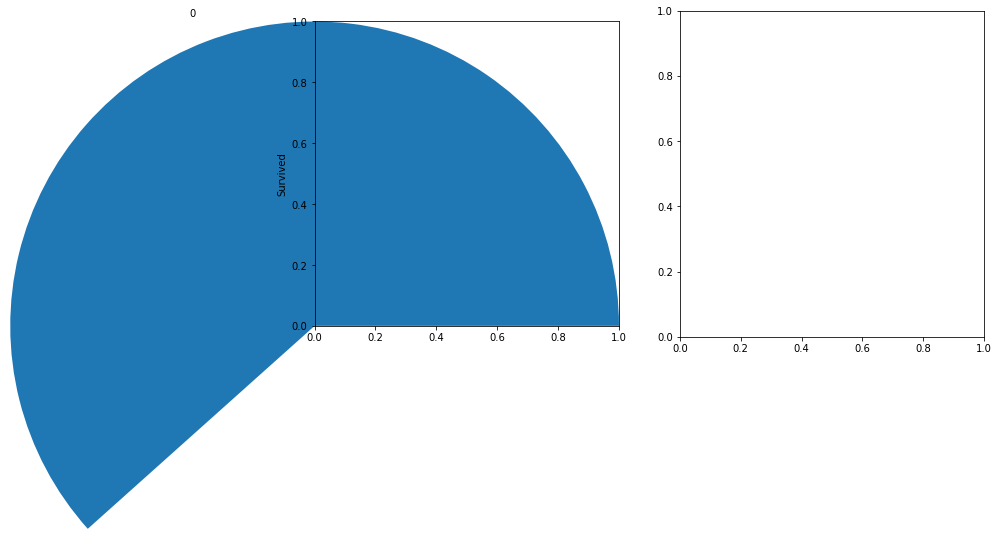

In [87]:
f,ax = plt.subplots(1,2,figsize=(12,6))

raw_data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.2f%', ax=ax[0])

ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=raw_data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

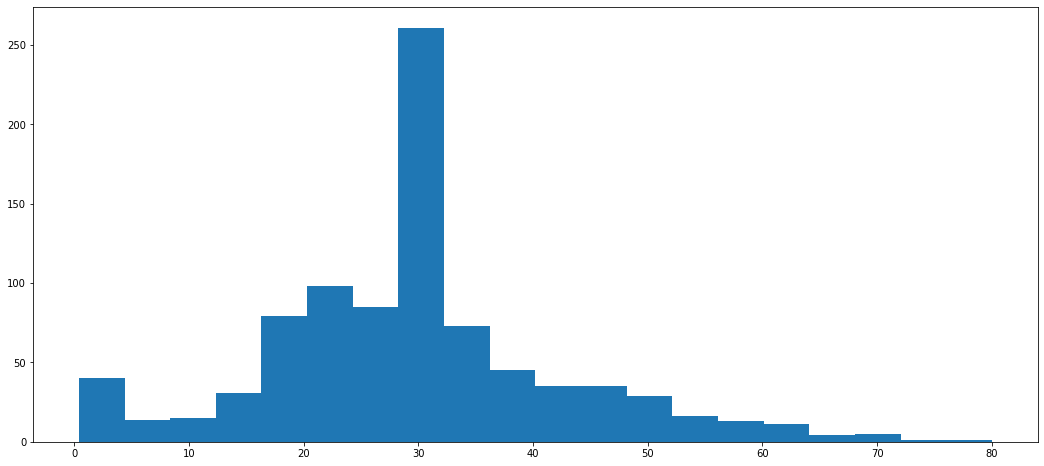

In [80]:
raw_data['Age'].hist(bins=20, figsize=(18,8), grid=False);

In [82]:
raw_data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048241,0.416667,0.356481,84.154687
2,0.472826,29.867011,0.402174,0.380435,20.662183
3,0.242363,26.403503,0.615071,0.393075,13.675550


In [89]:
# 상관계수 계산 함수 .corr()
raw_data.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069811,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331334,0.083081,0.018443,-0.549500
Age,-0.069811,-0.331334,1.000000,-0.232624,-0.179194,0.091563
SibSp,-0.035322,0.083081,-0.232624,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179194,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091563,0.159651,0.216225,1.000000


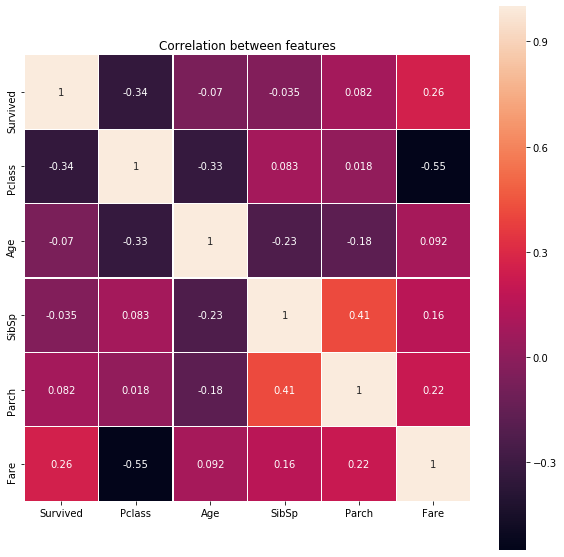

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), linewidths=0.01, square=True, annot=True, linecolor="white")

plt.title('Correlation between features')
plt.show()

## 나이 구간별 및 성별 생존률 확인

In [92]:
# 구간을 나눠서 라벨링
raw_data['Age_cat'] = pd.cut(raw_data['Age'],
                            bins=[0, 3, 7, 15, 30, 60, 100],
                            include_lowest=True,
                            labels=['baby', 'children', 'teenage', 'young', 'adult', 'old'])
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,England,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,England,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,England,adult


In [93]:
raw_data.groupby('Age_cat').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age_cat,,,,,,
baby,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
children,0.700000,2.650000,4.950000,1.750000,1.350000,27.905830
teenage,0.454545,2.696970,11.500000,1.727273,1.121212,35.217430
young,0.335984,2.487078,25.527634,0.429423,0.234592,25.954455
adult,0.420495,1.954064,41.132509,0.363958,0.392226,42.429225
old,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


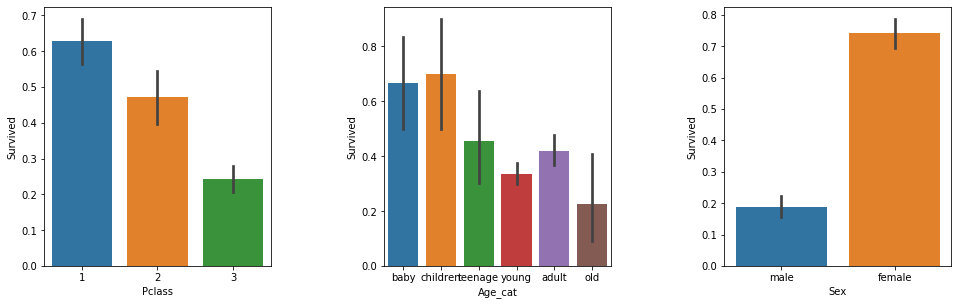

In [95]:
plt.figure(figsize=[14,4])
# 1행 3열의 첫번째 그림
plt.subplot(131)
sns.barplot('Pclass', 'Survived', data=raw_data)
plt.subplot(132)
sns.barplot('Age_cat', 'Survived', data=raw_data)
plt.subplot(133)
sns.barplot('Sex', 'Survived', data=raw_data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)
plt.show()

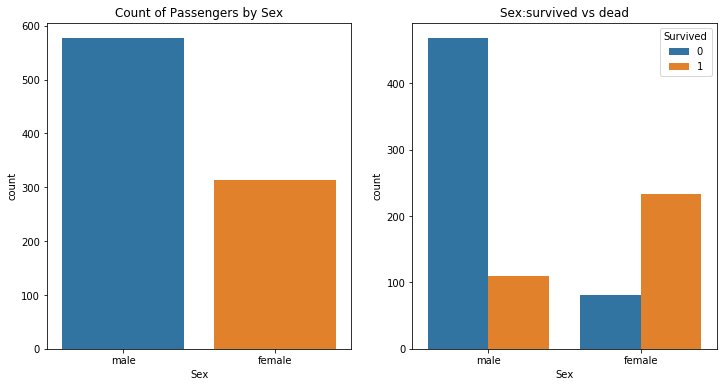

In [101]:
f,ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot('Sex', data=raw_data, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('Sex', hue='Survived', data=raw_data, ax=ax[1])
ax[1].set_title('Sex:survived vs dead')
plt.show()

## 귀족들의 생존률만 다시 조사
- 이름에 호칭이 포함

In [102]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,England,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,France,adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,England,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,England,adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,England,adult


In [103]:
raw_data.loc[1, 'Name']

'Braund, Mr. Owen Harris'

In [104]:
raw_data.loc[1, 'Name'].split(',')[1]

' Mr. Owen Harris'

In [105]:
raw_data.loc[1, 'Name'].split(',')[1].split(',')[0]

' Mr. Owen Harris'

In [109]:
raw_data.loc[1, 'Name'].split(',')[1].split('.')[0].strip()

'Mr'

In [107]:
test = lambda x: x+2
test(2)

4

In [108]:
list(map(test, range(5)))

[2, 3, 4, 5, 6]

In [ ]:
conversion_rare = lambda x: x.split(',')[1].split('.')

raw_data['title'] = raw_data['Name'].map(conversion_)